# 4o e 5o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : 2


In [ ]:
#
# Primeiro vamos importar as bibliotecas necessárias
#
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import cmath
from scipy.signal import convolve, correlate
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Definição do par de transformadas DFT - (direta e inversa)   

O par de transformadas discretas de Fourier (Discrete Fourier Transform - DFT) para um sinal de tempo discreto $x[k]$ com índice das amostras igual $k$ e o correspondente espectro de Fourier $X[\mu]$ com índice de frequências $\mu$ é calculado como  
\begin{align}
\text{DFT}: Y[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}Y[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Observe o sinal negativo na função exponential da transformada direta (DFT) e o fator de normalização $1/N$ na transformada inversa (IDFT). Essa convensão é usada pela maioria dos livros textos de DSP e também pela biblioteca Python `numpy.fft.fft()`, `numpy.fft.ifft()` e funções do Matlab `fft()`, `ifft()`.

# PROBLEMA 1

## DFT e IDFT com "loops for"

Agora vamos implementar a DFT e a IDFT usando "loops for". Embora isso possa ser útil para entender e validar algoritmos em sua fase inicial de desenvolvimento, isso deve ser evitado para um código usado na prática: "loops for" normalmente são lentos e muitas vezes mais complicados de ler do que implementações usando matrizes e vetores. Especialmente para $N$ muito grandes, o tempo de computação é muito longo.

De qualquer forma, o conceito de "loop for" é: a DFT pode ser implementada com um "loop for" externo iterando sobre $\mu$ e um "loop for" interno somando todos os $k$ para um $\mu$ específico.

Usamos variável com subscrito _ aqui, a fim de salvar bons nomes de variáveis para o cálculo baseado em matriz.

## Parte A

Escreva as funções DFT e IDFT que calculam, respectivamente, as transformadas discretas de Fourier direta e inversa.

In [ ]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_1D(x):

    N = len(x)
    Y = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
    for mu_ in range(N):  # do for all DFT frequency indices
        for k_ in range(N):  # do for all sample indices
            Y[mu_] += x[k_] * np.exp(-1j*2*np.pi/N*k_*mu_)

    return Y

In [ ]:
#
# Função para calcular a IDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos)
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo
#
def IDFT_1D(Y):

    N = len(Y)
    x = np.zeros((N, 1), dtype=complex)  # alloc RAM, init with zeros
    for k_ in range(N):
        for mu_ in range(N):
            x[k_] += Y[mu_] * np.exp(+1j*2*np.pi/N*k_*mu_)
    x *= 1/N  # normalization in the IDFT stage

    return x

## Parte B

Estude o código abaixo que cria uma sinal discreto composto pela soma de três ondas senoides com amplitude e frequências distintas.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


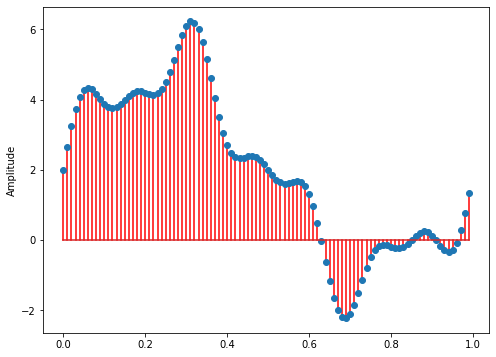

In [ ]:
# taxa de amostragem (sampling rate)
sr = 100

# intervalo de amostragem
ts = 1.0/sr
t = np.arange(0,1,ts)

x = 2

freq = 1.
x += 3*np.sin(2*np.pi*freq*t)

freq = 4
x += 1*np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.stem(t, x, linefmt='red')
plt.ylabel('Amplitude')

plt.show()

## Parte C

Escreva um código que utilize a função DFT criada anteriormente para calcular e plotar o espectro de frequências (abs(Y)) do sinal $x$ criado acima.

**OBS**: Observe que a DFT codificada recebe como entrada um sinal complexo e o sinal acima é do tipo real. Portanto, transforme o sinal $x$ em uma sequência complexa com a parte imaginária igual a zero.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


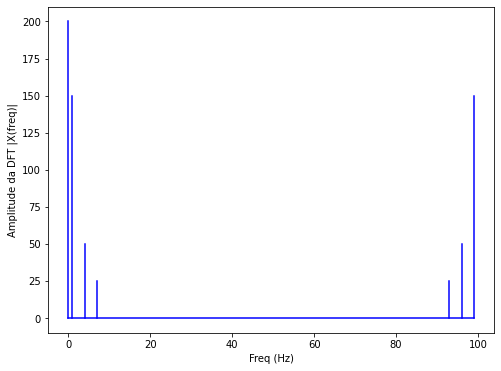

In [ ]:
# tamanho do vetor
N = len(x)

#for i in range(N):
#    x[i] = x[i] * (-1)**i

# cria um vetor de números complexos
x_ = x + 1j*0

# chamada à função DFT
Y = DFT_1D(x_)

# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(Y), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')
plt.show()

No gráfico acima é possível notar que a saída da DFT é simétrica na metade da taxa de amostragem (você pode tentar uma taxa de amostragem diferente para testar).

Essa metade da taxa de amostragem é chamada de **frequência de Nyquist**, em homenagem ao engenheiro eletrônico **Harry Nyquist**. Harry Nyquist e Claude Shannon criaram o famoso teorema de amostragem de **Nyquist-Shannon**, que afirma que um sinal amostrado a uma taxa $f_s$ pode ser totalmente reconstruído se contiver apenas componentes de frequência abaixo da metade dessa frequência de amostragem, ou seja, a taxa de amostragem deve ser maior que duas vezes a máxima frequência do sinal, $f_s > f_{max}$.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves th

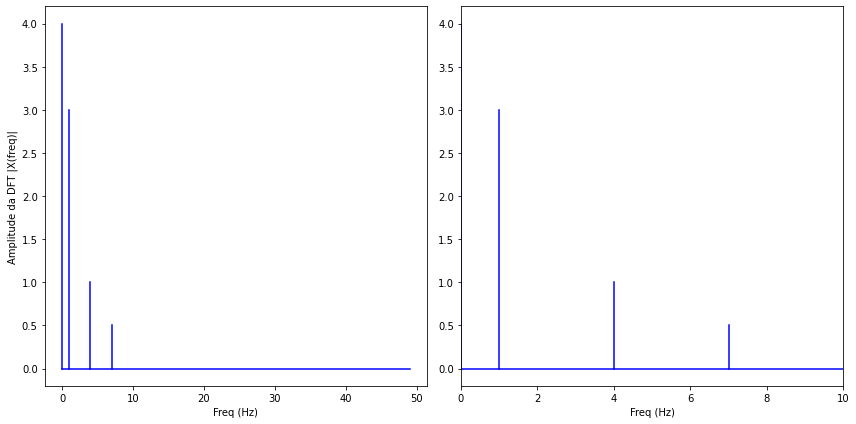

In [ ]:
n_oneside = N//2

# obtem as frequências de um lado
f_oneside = freq[:n_oneside]

# normaliza a amplitude do sinal
Y_oneside =Y[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(Y_oneside), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
# Limita o eixo x até frequência de 10 Hz
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

## Limitações da DFT implementada

O principal problema com a implementação da DFT acima é que ela não é eficiente se tivermos um sinal com muitas amostras. Nesse caso, o cálculo da DFT pode levar muito tempo.

## Parte D

Escreva uma função em python que implemente o sinal indicado abaixo.

\begin{equation}
f(t) = 3sin(2\pi f t),
\end{equation}

sendo $f=2$ Hz

In [ ]:
#
# sr = taxa de amostragem
#
def sinal(sr):
    '''
    função para gerar um sinal 1D simples com diferentes taxas de amostragem
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)

    return x

## Parte E

Escreva um simples programa em python que varia a taxa de amostragem (sr) do sinal acima de 500 e 1000, com passo de 100 e, para cada uma das taxas, determine a DFT do sinal gerado e imprima o tempo de de execução.

**OBS** Use o código abaixo como exemplo de como medir o tempo de execução

import time
start_time = time.time()
main()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
import time

start = 500
stop  = 1000
step  = 100

for i in range(start, stop+step, step):
    x = sinal(i)
    x_ = x + 1j*0

    start_time = time.time()
    Y = DFT_1D(x_)
    print("--- %s seconds ---" % (time.time() - start_time))

--- 1.1762044429779053 seconds ---
--- 1.753769874572754 seconds ---
--- 2.3443336486816406 seconds ---
--- 3.063636064529419 seconds ---
--- 3.6490893363952637 seconds ---
--- 4.535329818725586 seconds ---


## Parte F

Agora, utilize a função IDFt para obter e plotar o sinal original $x$ criado na "parte A" a partir do seu espetro $Y$ obtido na "parte C"

**OBS**: Observe que a IDFT codificada recebe como entrada um sinal complexo e retorna um sinal complexo. Portanto, para obter o sinal $x$ criado na "parte A", você precisa utilizar apenas a parte real do sinal de retorno.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

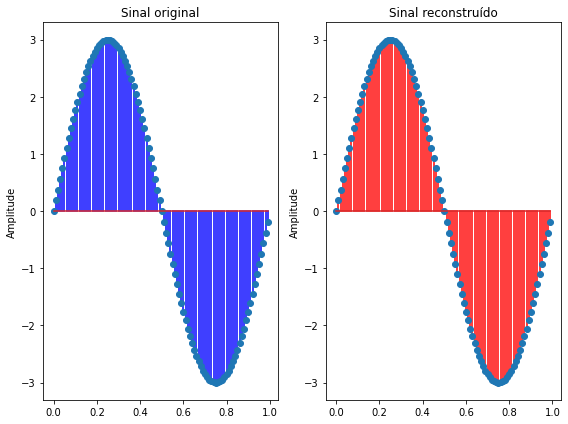

In [ ]:
#
# Taxa de amostragem (sampling rate)
#
sr = 100
ts = 1.0/sr
t = np.arange(0,1,ts)

#
# Constroe o sinal complexo
#
x_o = sinal(sr)
x_c = x_o + 1j*0

#
# transformada direta
#
Y = DFT_1D(x_c)

#
# transformada inversa
#
x_c = IDFT_1D(Y)

#
# extrai sinal original
#
x_r = np.real(x_c)

#
# Plota os sinais original e reconstruído
#
plt.figure(figsize=[8, 6.])
plt.subplot(1, 2, 1)
plt.title("Sinal original")
plt.stem(t, x_o, linefmt='blue')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.title("Sinal reconstruído")
plt.stem(t, x_r, linefmt='red')
plt.ylabel('Amplitude')
plt.tight_layout()

# PROBLEMA 2

## Parte A

Estenda para sinais 2D (imagens) os códigos da DFT e IDFT implementados anteriormente para sinais 1D

**DICA**: Use do fato que a 2D-DFT pode ser escrita a partir da 1D-DFT, como indicado abaixo


\begin{equation}
F(u,v) = \frac{1}{MN} \sum_{x=0}^{N} \sum_{y=0}^{M} f(x,y) e^{-j 2\pi \left( \frac{ux}{N} + \frac{vy}{M} \right)} = \frac{1}{M} \sum_{y=0}^{M} \left[ \frac{1}{N} \sum_{x=0}^{N} f(x,y)  e^{-j 2\pi \frac{ux}{N}} \right] e^{-j 2\pi \frac{vy}{M}}
\end{equation}

In [ ]:
#
# Função para calcular a DFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: x -> vetor contendo as amostras (números complexos) do sinal no tempo
# Saída: Y -> vetor contendo os coeficientes espectrais (números complexos) - (dtype=complex)
#
def DFT_2D(x):

    rows, cols = x.shape
    Y = np.empty_like(x)

    for row in range(0,rows):
        Y[row,:] = DFT_1D(x[row,:]).reshape((rows,))
    Y = Y.transpose()
    for col in range(0,cols):
        Y[col,:] = DFT_1D(x[col,:]).reshape((cols,))
    Y = Y.transpose()

    return Y

In [ ]:
import cv2
import matplotlib.pyplot as plt

fileName = "cameraman.tiff"

im_gray = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
im_cplx = im_gray + 1j*0

Y = DFT_2D(im_cplx)

In [ ]:
#
# Função para calcular a iDFT (com loops for) de um sinal de valor complexo (dtype=complex)
#
# Entrada: Y -> vetor contendo os coeficientes espectrais (números complexos)
# Saída: x -> vetor contendo as amostras (números complexos) do sinal no tempo
#
def IDFT_2D(Y):

    rows, cols = Y.shape
    x = np.empty_like(Y)

    for row in range(0,rows):
        x[row,:] = IDFT_1D(Y[row,:]).reshape((rows,))
    x = x.transpose()
    for col in range(0,cols):
        x[col,:] = IDFT_1D(Y[col,:]).reshape((cols,))
    x = x.transpose()

    return x

## Parte B

Escreva um código simples que leia a imagem **cameraman.tiff**, calcule a sua DFT e plote o espectro de Fourier.

**OBS**: Use a função do opencv para a leitura e visualização da imagem e do seu espetro.

**DICA de USO - Leitura e Escrita de uma imagem**

im_gray = cv2.imread('Nome_da_Imagem', cv2.IMREAD_GRAYSCALE)

cv2.imwrite('Nome_da_Imagem', im_gray)

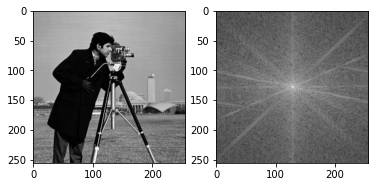

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

fileName = "cameraman.tiff"
im_gray = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)


# resize image
resized = cv2.resize(im_gray, (64,64), interpolation = cv2.INTER_AREA)

Y = np.fft.fft2(im_gray)
Yshifted = np.fft.fftshift(Y)

Spectrum = 20*np.log(np.abs(Yshifted)+1)

plt.subplot(121),plt.imshow(im_gray, cmap='gray')
plt.subplot(122),plt.imshow(Spectrum, cmap='gray')
plt.show()

# PROBLEMA 3

## Parte A - Representação matricial da DFT - (transformada direta)

Como vimos em sala de aula, a DFT pode ser escrita na forma matricial como indicado abaixo.

\begin{equation}
    \textrm{DFT : } \quad F_{k} = \sum_{n=0}^{N-1}x_n\cdot e^{-\frac{j2\pi kn}{N}} =  \sum_{n=0}^{N-1}x_n\cdot (W_{N})^{kn}, \quad k=0,1,\ldots,N-1  \nonumber
\end{equation}

sendo $W_N = e^{-\frac{j2\pi}{N}}$ o núcleo da transformada.

\begin{equation}
		\begin{bmatrix}
			F_{0} \\ F_{1} \\ F_{2} \\ \vdots \\ F_{N-1}
		\end{bmatrix}
		=
		\begin{bmatrix}
			1      & 1           & 1              & \dots  & 1               \\
			1      & W_{N}       & W_{N}^2        & \dots  & W_{N}^{N-1}     \\
			1      & W_{N}^{2}   & W_{N}^4        & \dots  & W_{N}^{2(N-1)}  \\
			\vdots & \vdots      & \vdots         & \ddots & \vdots          \\
			1      & W_{N}^{N-1} & W_{N}^{2(N-1)} & \dots  & W_{N}^{(N-1)^2}
		\end{bmatrix}
		\begin{bmatrix}
			x_0 \\ x_1  \\ x_2 \\ \vdots \\ x_{N-1}
		\end{bmatrix} \nonumber
\end{equation}

Escreva um código que implemente a matrix da DFT como indicada acima.

**DICA**: Estude a função meshgrid do numpy. Crie um meshgrid de tamanho $N \times N$ e utilize os seus índices para gerar a matrix $W$

In [ ]:
#
# Entrada: N -> tamanho da matrix DFT
# Saída: W -> matrix DFT
#
def DFT_matrix(N):
  nx = np.linspace(0, N, N+1)
  ny = np.linspace(0, N, N+1)

  xv, yv = np.meshgrid(nx, ny)
  ma = np.zeros(N, dtype=complex)
  W = np.exp((-1)*np.imag(0+1j)*2*np.pi/N)**(xv*yv)

  return W

Utilizando a matriz DFT gerada acima, encontre o espectro de Fourier do sinal gerado no PROBLEMA 1 - Parte B e compare o resultado com o resultado obtido no PROBLEMA 1 - Parte C.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


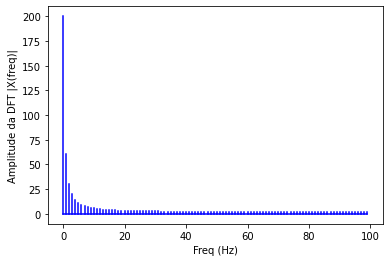

In [ ]:
dft = DFT_matrix(len(x)-1)
xT = x.reshape(-1, 1)
rep = np.dot(dft, xT)

# tamanho do vetor
N = len(x)

#for i in range(N):
#    x[i] = x[i] * (-1)**i

# cria um vetor de números complexos
x_ = x + 1j*0


# calcula a frequência
n = np.arange(N)
T = N/sr
freq = n/T
plt.stem(freq, abs(rep), linefmt='blue', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude da DFT |X(freq)|')
plt.show()

## Parte B - Representação matricial da iDFT - (transformada inversa)

Como vimos em sala de aula, a iDFT pode ser escrita na forma matricial como indicado abaixo.

\begin{equation}
    \textrm{iDFT : } \quad x_{n} = \frac{1}{N}\sum_{K=0}^{N-1}F_k\cdot e^{\frac{j2\pi kn}{N}}, \quad n=0,1,\ldots,N-1  \nonumber
\end{equation}

\begin{equation}
    \begin{bmatrix}
        x_{0} \\ x_{1} \\ x_{2} \\ \vdots \\ x_{N-1}
    \end{bmatrix}
    = \frac{1}{N}
    \begin{bmatrix}
        1      & 1              & 1               & \dots  & 1               \\
        1      & W_{N}^{-1}     & W_{N}^{-2}      & \dots  & W_{N}^{-(N-1)}     \\
        1      & W_{N}^{-2}     & W_{N}^{-4}      & \dots  & W_{N}^{-2(N-1)}  \\
        \vdots & \vdots         & \vdots          & \ddots & \vdots          \\
        1      & W_{N}^{-(N-1)} & W_{N}^{-2(N-1)} & \dots  & W_{N}^{-(N-1)^2}
        \end{bmatrix}
        \begin{bmatrix}
        F_0 \\ F_1  \\ F_2 \\ \vdots \\ F_{N-1}
    \end{bmatrix} \nonumber
\end{equation}

Escreva um código que implemente a matrix da iDFT como indicada acima e plot o sinal gerado. Verifique se o sinal é igual ao sinal original usado como entrada na parte A desse problema.

In [ ]:
#
# Entrada: N -> tamanho da matrix DFT
# Saída: W -> matrix DFT
#
def iDFT_matrix(N):
  nx = np.linespace(0, N, N+1)
  ny = np.linespace(0, N, N+1)

  xv, yv = np.mershgrid(nx, ny)
  ma = np.zeros(N, dtype=complex)
  ma = (np.exp(np.imag(0+1j)*2*np.pi/N))**(xv*yv)
  W = ma*(1/N)


  return W

## Parte C - caso 2D

Pense em como usar as matrizes DFTs 1D implementadas anteriormente para o caso de imagens (sinal 2D)

In [ ]:
def DFT_2D(img):
  img_rows, img_cols = img.shape

  dft_1d = DFT_matrix(img_rows-1)
  img_rows_transpose = np.array(img).T

  result = np.zeros((img_rows, img_cols), dtype=complex)

  for i in range(img_cols):
    result[i:,] = np.dot(dft_1d, img_rows_transpose[i:,])

  return result

# PROBLEMA 4

Como vimos na teoria, a convolução de dois sinais no domínio do tempo/espaço é realizada na frequência como a multiplicação das transformadas de Fourier dos respectivos sinais.

<img src="fft_steps.png" width="80%" height="100%">

## Parte A - implementação dos passos 1 a 3

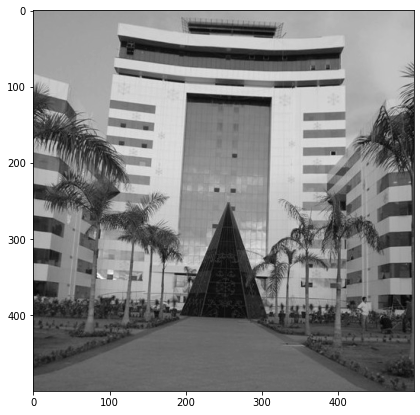

In [ ]:
# Leitura de imagem
img = cv2.imread('predio.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=[7,7])
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
#
# Step 1 - Padding da imagem
#

img_rows, img_cols = img.shape

img_padded = np.zeros((512, 512), dtype=img.dtype)
for i in range(img_rows):
  for j in range(img_cols):
    img_padded[i][j] = img[i][j]

img_fft_nshift = np.fft.fft2(img_padded)
#plt.imshow(img_fft_nshift.real, cmap="gray")
#
# Step 2 - Multiplicao da imagem após padding por (-1)^(x+y)
#

for i in range(img_rows):
  for j in range(img_cols):
    img_padded[i][j] *= (-1)**(i+j)

#cv2_imshow(img_padded)
#
# Step 3 - Converter imagem do domínio do espaço para o domínio da frequência
#
# OBS: Nesse passo, utilize a função np.fft.fft2() do numpy
#

img_fft_shifted = np.fft.fft2(img_padded)
rimg = np.fft.ifft2(img_fft_shifted)



**OBS1**: Lembre que a transformada de fourier gera um conjunto de números complexos

$F(\mu) = Real(\mu) + j*Imaginária(\mu)$

e, portanto, podemos calcular


$Magnitude = |F(\mu)| = \sqrt{(Real(\mu)² + Imaginaria(\mu)²)}$


$Fase = \phi(\mu)) = atan⁻¹\left( \frac{Imaginaria(\mu)}{Real(\mu)} \right)$


**OBS2**: Lembre que, para melhor visualização do espectro de Fourier, é importante alterar a faixa dinâmica da magnitude dos coeficientes, como:

$c*log(1+|F(\mu)|)$

sendo $c$ uma constante para escalonamento. Use $c=30$ para melhor visualização.

Crie um subplot (plt.subplot()) que mostre a magnitude (antes e depois o escalonamento indicado acima) e a fase do espectro.  

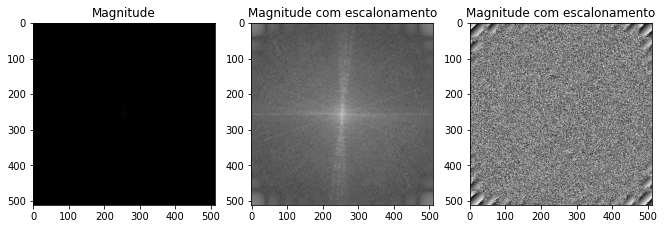

In [ ]:
magnitude_antes = np.zeros((img_rows, img_cols))

plt.figure(figsize = (15, 15))
# Magnitude Antes
magnitude_antes = np.abs(img_fft_shifted)
plt.subplot(141), plt.imshow(magnitude_antes, cmap = 'gray'), plt.title("Magnitude")
# Magnitude Depois
magnitude_depois =  30*np.log(np.abs(img_fft_shifted)+1)
plt.subplot(142), plt.imshow(magnitude_depois, cmap = 'gray'), plt.title("Magnitude com escalonamento")

# Fase
fase = np.arctan(img_fft_shifted.imag/img_fft_shifted.real)
plt.subplot(143), plt.imshow(fase, cmap = 'gray'), plt.title("Magnitude com escalonamento")


plt.show()

Crie um subplot (plt.subplot()) que mostre a magnitude escalonada do espectro **com e sem** a execução do Step 2. Estude os resultados.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f381550cfd0>,
 <matplotlib.image.AxesImage at 0x7f38153e0b10>)

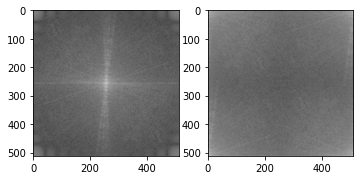

In [ ]:
plt.figure(figsize = (12, 12))

magnitude_antes_nshift = np.abs(img_fft_nshift)
magnitude_sem_shift =  30*np.log(np.abs(img_fft_nshift)+1)

plt.subplot(141), plt.imshow(magnitude_depois, cmap = 'gray')
plt.subplot(142), plt.imshow(magnitude_sem_shift, cmap = 'gray')

## Parte B - implementação do passo 4

In [ ]:
#
# Step 4 - geração de um filtro passa-baixa (de tamanho PxQ) no domínio da frequência
#
def ideal_low_pass_filter(img, radius):
    '''Cria um filtro passa-baixa de mesma dimensão que img.
       radius define o raio do filtro, isto é, a máxima frequência que será mantida na imagem'''

    num_rows, num_cols = img.shape
    freq_r = np.fft.fftfreq(num_rows)
    freq_c = np.fft.fftfreq(num_cols)
    freq_r = np.fft.fftshift(freq_r)
    freq_c = np.fft.fftshift(freq_c)

    low_pass_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if distance <= radius:
                low_pass_filter[row, col] = 1

    return low_pass_filter

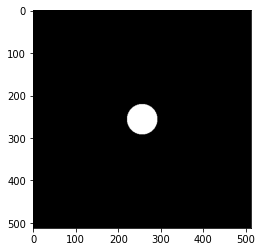

In [ ]:
#
# Crie e mostre (plt.imshow) um filtro usando o código acima com radius = 0.07
#
#image  = cv2.imread("predio.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(ideal_low_pass_filter(img_padded,0.07), cmap="gray")

## Parte C - implementação do passo 5

Implemente abaixo a seguinte equação: $G(\mu, v) = H(\mu, v).F(\mu, v) $

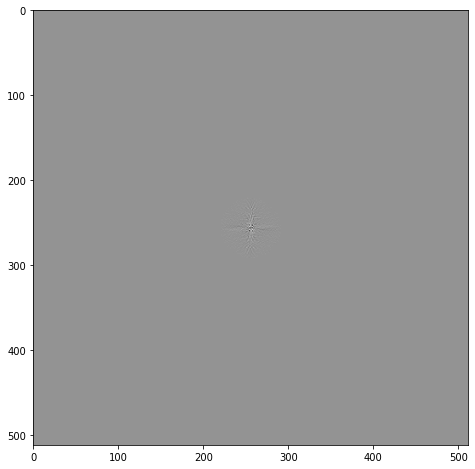

In [ ]:
plt.figure(figsize = (8, 8))
img_fft_shifted = np.fft.fft2(img_padded)
H = ideal_low_pass_filter(img_padded,0.07)
G = img_fft_shifted*H
plt.imshow(G.real, cmap="gray")


## Parte D - implementação do passo 6

Implemente um código que faça a conversão da imagem do domínio da frequência para o domínio do espaço.

Plot o resultado obtido.

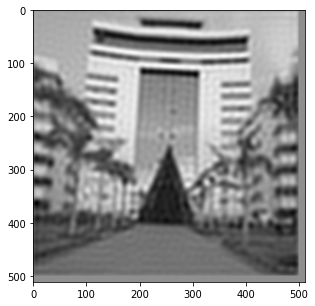

In [ ]:
img_padded = np.zeros((512, 512), dtype=img.dtype)

img_filtered = np.fft.ifft2(G)

for i in range(img_rows):
  for j in range(img_cols):
    img_filtered[i][j] *= (-1)**(i+j)

plt.figure(figsize = (5, 5))
plt.imshow(img_filtered.real, cmap="gray")



## Parte E - implementação do passo 7

Implemente um código para extrair a região $M \times N$ do quadrante superior esquerda da imagem resultante do passo 6.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


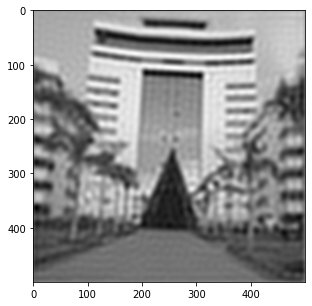

In [ ]:
img_rows, img_cols = 500, 500
img_filtered_final = np.zeros((500,500))

#Crop
for i in range(img_rows):
  for j in range(img_cols):
      img_filtered_final[i][j] = img_filtered[i][j]

plt.figure(figsize = (5, 5))
plt.imshow(img_filtered_final.real, cmap="gray")

## Parte F - implementação de um filtro passa baixa Gaussiano

Modifique o código do passo 4 para criar um filro passa baixa Gaussiano.

Usando esse novo filtro execute novamente os passos 5, 6 e 7. Analise os resultados obtidos usando os dois filtros.

In [ ]:
def ideal_low_pass_filter(img, radius):

    num_rows, num_cols = img.shape
    freq_r = np.fft.fftfreq(num_rows)
    freq_c = np.fft.fftfreq(num_cols)
    freq_r = np.fft.fftshift(freq_r)
    freq_c = np.fft.fftshift(freq_c)

    low_pass_filter = np.zeros([num_rows, num_cols])
    for row in range(num_rows):
        for col in range(num_cols):
            distance = np.sqrt(freq_r[row]**2 + freq_c[col]**2)
            if distance <= radius:
                low_pass_filter[row, col] = 1

    return low_pass_filter

# That's All Folks